In [1]:
import numpy as np
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
from provabgs import infer as Infer
from provabgs import models as Models
from provabgs import corrprior as Corrprior

In [3]:
m_nmf = Models.NMF(burst=True, emulator=True)
prior = Infer.load_priors([
    Infer.UniformPrior(9., 12.), 
    Infer.FlatDirichletPrior(4, label='sed'),   # flat dirichilet priors
    Infer.UniformPrior(0., 1.), # fburst
    Infer.UniformPrior(0., 13.27), # tburst 
    Infer.UniformPrior(6.9e-5, 7.3e-3, label='sed'),# uniform priors on ZH coeff
    Infer.UniformPrior(6.9e-5, 7.3e-3, label='sed'),# uniform priors on ZH coeff
    Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust1 
    Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust2
    Infer.UniformPrior(-2.2, 0.4, label='sed')     # uniform priors on dust_index 
])

In [4]:
z_obs = 0.1

In [5]:
CP_kde = Corrprior.CorrectPrior(
    m_nmf, 
    prior, 
    zred=z_obs,
    props=['logavgssfr_1gyr', 'z_mw'], 
    Nprior=100000, 
    method='kde', 
    debug=True
)

... calculating log avg sSFR_1Gyr
... calculating mass-weighted Z
... fitting prior(derived prop)
... fitting pdf using kde


In [6]:
_theta_prior = np.array([prior.sample() for i in range(100000)])
theta_prior = prior.transform(_theta_prior)

In [7]:
deriv_prop = CP_kde._get_properties(theta_prior)

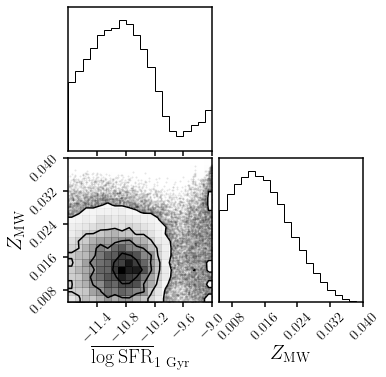

In [8]:
_ = DFM.corner(
    deriv_prop, 
    range=[[-12, -9], [0.005, 0.04]],
    labels=[r'$\overline{\log{\rm SFR}}_{\rm 1~Gyr}$', r'$Z_{\rm MW}$'], 
    label_kwargs={"fontsize":20})

In [9]:
w_imp = CP_kde.get_importance_weights(
    theta_prior, 
    outlier=0.01,
    debug=True
)

... clipping values outside 1.95395e-03, 2.49265e+01


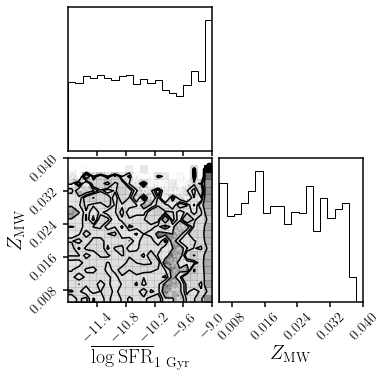

In [10]:
_ = DFM.corner(
    deriv_prop, 
    weights=w_imp, 
    range=[[-12, -9], [0.005, 0.04]],
    labels=[r'$\overline{\log{\rm SFR}}_{\rm 1~Gyr}$', r'$Z_{\rm MW}$'], 
    label_kwargs={"fontsize":20})

In [22]:
CP_gmm = Corrprior.CorrectPrior(
    m_nmf, 
    prior, 
    zred=z_obs,
    props=['logavgssfr_1gyr', 'z_mw'], 
    Nprior=100000, 
    method='gmm', 
    debug=True, 
    n_comp=50
)

... calculating log avg sSFR_1Gyr
... calculating mass-weighted Z
... fitting prior(derived prop)
... fitting pdf using gmm


In [23]:
w_imp = CP_gmm.get_importance_weights(
    theta_prior, 
    outlier=0.1
)

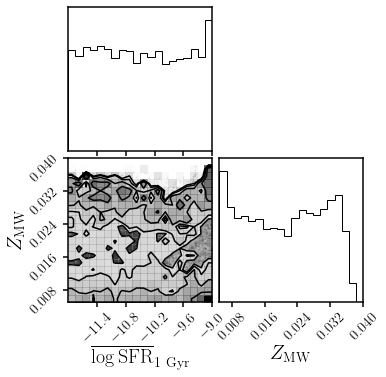

In [24]:
_ = DFM.corner(
    deriv_prop, 
    weights=w_imp, 
    range=[[-12, -9], [0.005, 0.04]],
    labels=[r'$\overline{\log{\rm SFR}}_{\rm 1~Gyr}$', r'$Z_{\rm MW}$'], 
    label_kwargs={"fontsize":20})